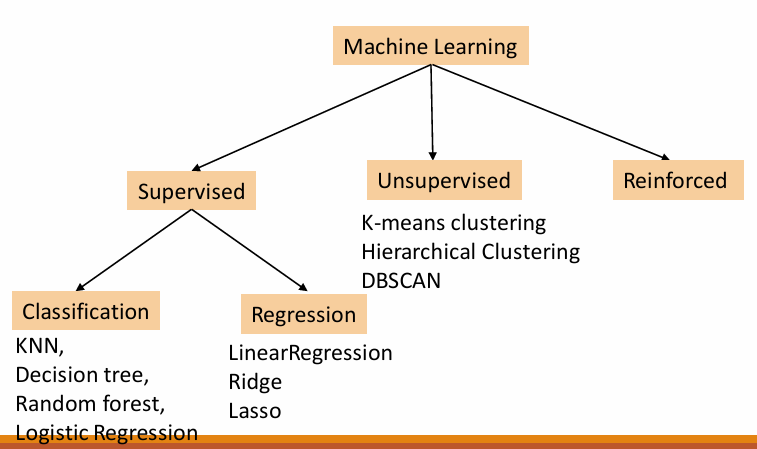



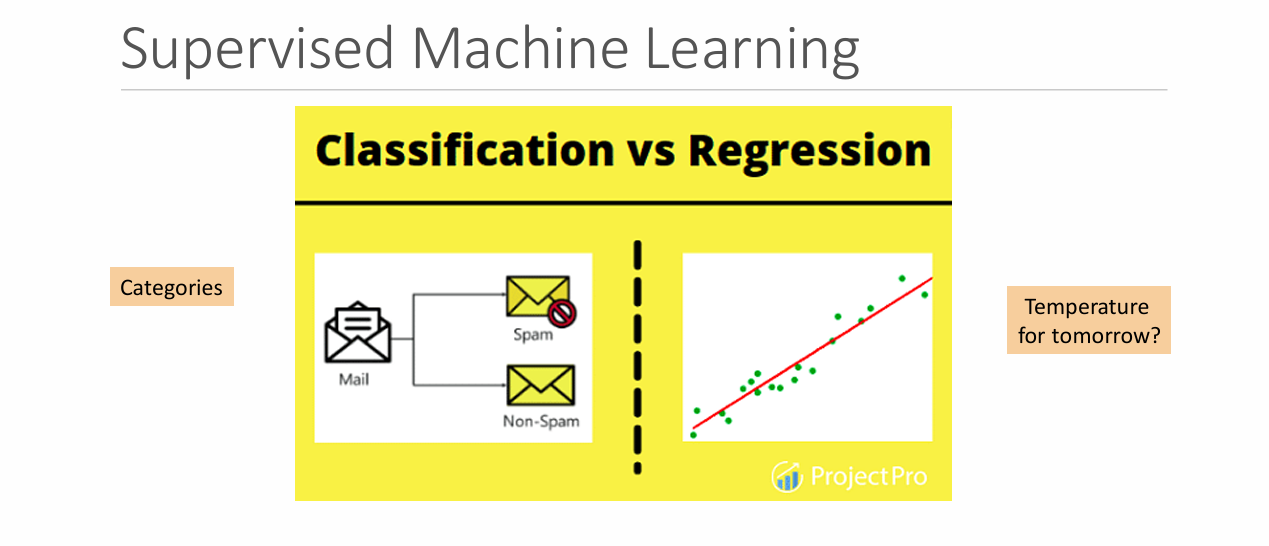

# SIMPLE LINEAR REGRESSION

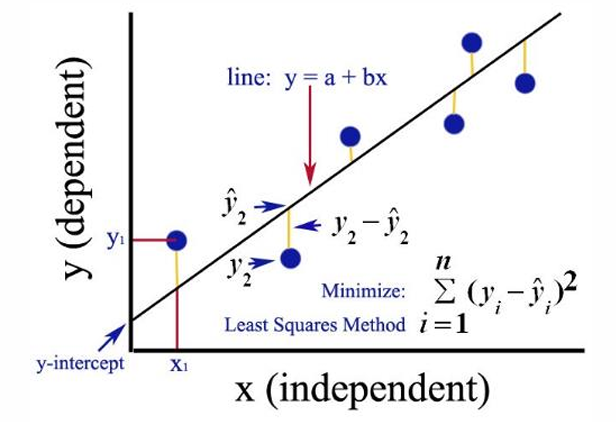

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

## Step 1

In [2]:
import pandas as pd
df = pd.read_csv("50_Startups.csv")
df.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


## Step 2 Perform basic data quality checks

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RND     50 non-null     float64
 1   ADMIN   50 non-null     float64
 2   MKT     50 non-null     float64
 3   STATE   50 non-null     object 
 4   PROFIT  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
df.isna().sum()

RND       0
ADMIN     0
MKT       0
STATE     0
PROFIT    0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(0)

## Understanding relation between  RnD and Profit 

### PROFIT ~ RND

<Axes: xlabel='RND', ylabel='PROFIT'>

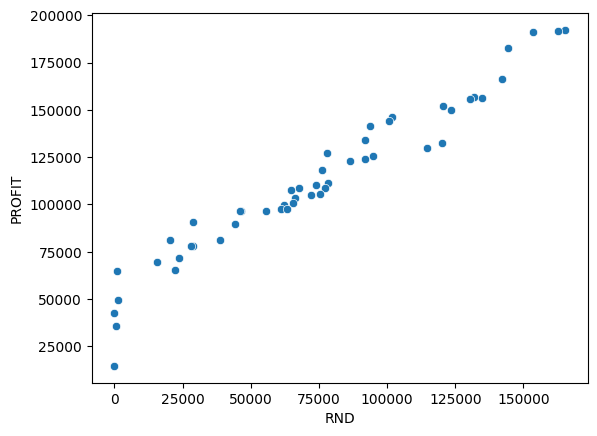

In [6]:
import seaborn as sns
sns.scatterplot(data=df, x="RND", y="PROFIT")

## Step 3 - Seperate X(RND) and Y(PROFIT)

In [7]:
X = df[["RND"]]            # USE DOUBLE [] TO GET RESULT IN DATAFRAME OTHERWISE O/PIN SERIES
X.head()

,RND
0,165349.20
1,162597.70
2,153441.51
3,144372.41
4,142107.34


In [8]:
Y = df[["PROFIT"]]
Y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


### Step 4 - Fit the Linear Regression Model

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
model = LinearRegression()
model.fit(X,Y)

LinearRegression()

### R2 Score check

In [11]:
model.score(X, Y)

0.9465353160804393

### Checking coefficient and intercept of the line

In [12]:
model.coef_

array([[0.85429137]])

In [13]:
model.intercept_

array([49032.89914125])

### PROFIT_est = 49032.9 + 0.8543*RND

### Step 4 - Model Evaluation
1. Mean Squared Error (MSE)
2. Root Mean Squared Error (RMSE)
3. Mean Absolute Error (MAE)
4. Mean Absolute Percentage Error (MAPE)
5. R2 Score

In [14]:
X.head()

,RND
0,165349.20
1,162597.70
2,153441.51
3,144372.41
4,142107.34


In [16]:
ypred = model.predict(X)
ypred[0: 5]

array([[190289.29389289],
       [187938.71118575],
       [180116.65707807],
       [172369.00320589],
       [170433.97345032]])

In [17]:
Y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


In [18]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y, ypred)
print(f"Mean Squared Error : {mse:.2f}")

Mean Squared Error : 85120931.33


In [19]:
25**(1/2)

5.0

In [20]:
64**(1/2)

8.0

In [21]:
rmse = mse**(1/2)
print(f"root Mean Squared Error : {rmse:.2f}")

root Mean Squared Error : 9226.10


In [23]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(Y, ypred)
print(f"Mean Absolute Error : {mae:.2f}")

Mean Absolute Error : 6910.98


In [24]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(Y, ypred)
print(f"Mean Absolute Percentage Error : {mape:.4f}")

Mean Absolute Percentage Error : 0.1107


In [25]:
from sklearn.metrics import r2_score
r2 = r2_score(Y, ypred)
print(f"R2 Score : {r2:.4f}")

R2 Score : 0.9465


In [26]:
model.score(X, Y)

0.9465353160804393

### R2 score > 0.8 i.e 80% it is a good fit

<Axes: xlabel='RND', ylabel='PROFIT'>

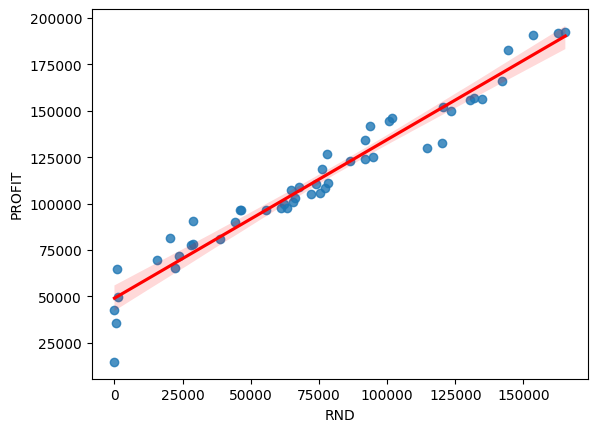

In [28]:
sns.regplot(data=df, x="RND", y="PROFIT", line_kws ={"color": "red"})


### Out of sample prediction 

In [30]:
rnd = 2_00_000
profit_est = model.predict([[rnd]])
print(f"For given rnd : {rnd}, Profit Estimated is : {profit_est}")

For given rnd : 200000, Profit Estimated is : [[219891.17332901]]
